# Resume Recommendation System

1. Setup aur Libraries Load Karna
Approach: Sab tools (libraries) load karenge jo training, visuals, aur text processing ke liye chahiye. Debugging ke liye bhi check rakhoonga.

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Graphs ke liye style
sns.set(style="whitegrid")
print("Setup ho gaya! Sab ready hai.")

Setup ho gaya! Sab ready hai.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreedhar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Dataset load karo
csv_path = "UpdatedResumeDataSet.csv"  # Tera path
data = pd.read_csv(csv_path)

# Preview aur info
print("Dataset :")
print(data.head())
print("\nDataset ki details:")
print(data.info())
print(f"\nTotal resumes: {len(data)}")
print(f"Unique categories: {data['Category'].nunique()}")

Dataset :
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Dataset ki details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Total resumes: 962
Unique categories: 25


3. Data Cleaning aur Visuals
Approach: Resume text ko clean karenge (special chars, numbers, stopwords hataenge) aur visuals se samjhege—word count aur category distribution.

In [16]:
# Text clean karne ka function
def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Special chars hatao
    text = re.sub(r'\d+', '', text)  # Numbers hatao
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Cleaned column banao
data['Cleaned_Resume'] = data['Resume'].apply(clean_text)
print("Ek cleaned resume:")
print(data['Cleaned_Resume'].iloc[0])


Ek cleaned resume:
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm naã bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process 

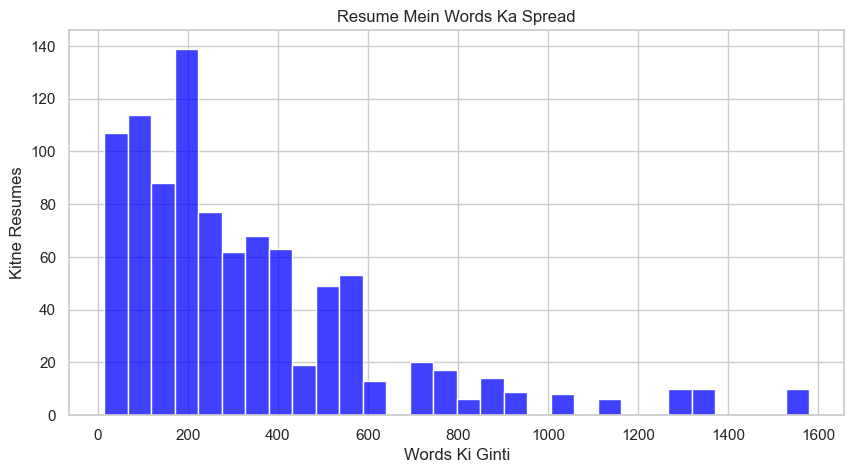

In [17]:

# Word count ka histogram
word_counts = data['Cleaned_Resume'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(word_counts, bins=30, color='blue')
plt.title("Resume Mein Words Ka Spread")
plt.xlabel("Words Ki Ginti")
plt.ylabel("Kitne Resumes")
plt.show()


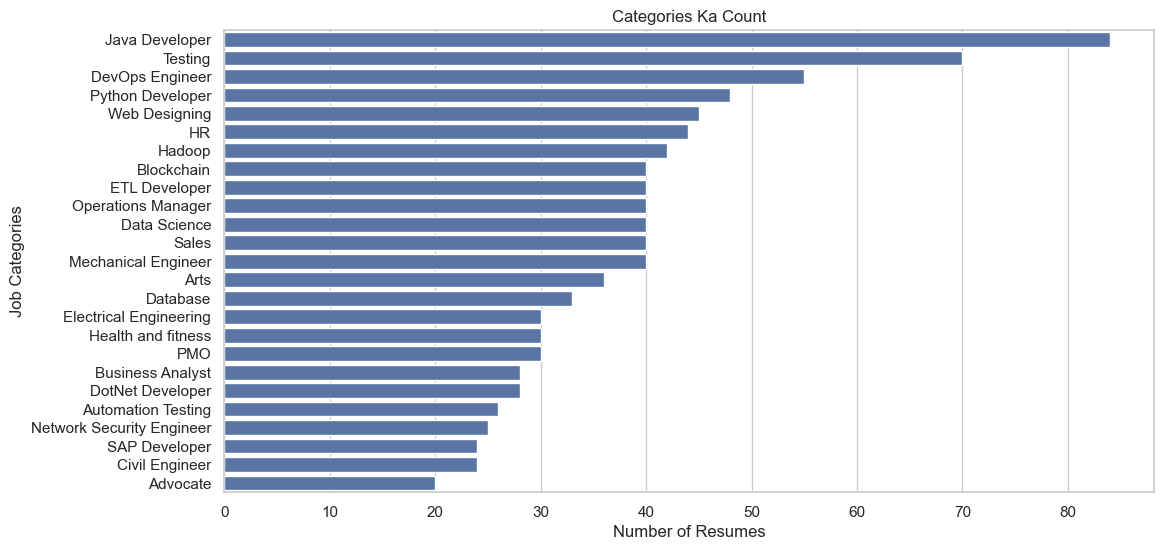

In [18]:

# Category distribution ka bar plot
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title("Categories Ka Count")
plt.xlabel("Number of Resumes")
plt.ylabel("Job Categories")
plt.show()


In [19]:

#  Cleaning check karo
print("Pehle 5 words of cleaned resume:", data['Cleaned_Resume'].iloc[0].split()[:5])

Pehle 5 words of cleaned resume: ['skills', 'programming', 'languages', 'python', 'pandas']


4. Features Extract Karna
Approach: Cleaned resume text ko TF-IDF se numbers mein badlenge (2000 features banayenge, jo 962 resumes ke liye optimal hai), aur top words ka graph banayenge taaki samajh aaye model kya dekhega.

In [20]:
# Text ko features mein convert karo
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))  # 2000 features aur bigrams
X = vectorizer.fit_transform(data['Cleaned_Resume'])

# Labels ko numbers mein badlo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'])

# Basic info print karo
print(f"Features ban gaye: {X.shape[1]}")
print(f"Kuch sample features: {vectorizer.get_feature_names_out()[:10]}")





Features ban gaye: 2000
Kuch sample features: ['ability' 'able' 'academic' 'academy' 'accenture' 'acceptance' 'access'
 'access users' 'accordance' 'according']


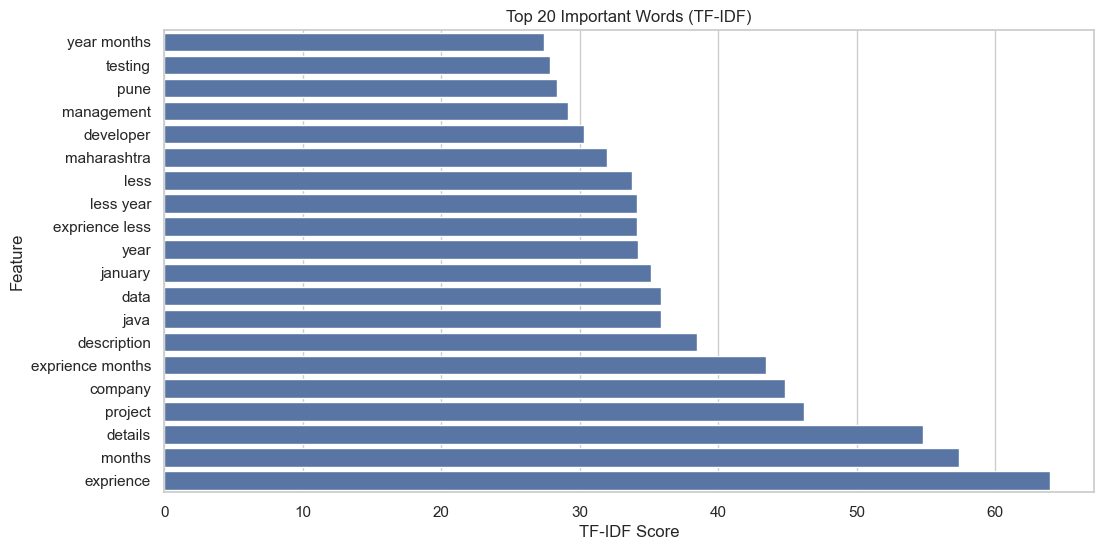

In [ ]:
# Top 20 TF-IDF features ka bar plot
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
top_indices = tfidf_scores.argsort()[-20:]
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_scores[top_indices], y=feature_names[top_indices])
plt.title("Top 20 Important Words (TF-IDF)")
plt.xlabel("TF-IDF Score")
plt.ylabel("Feature") 
plt.show()

#above used for feature importance 



In [22]:
# Check  features  
print("first  resume  feature count (non-zero):", X[0].nnz)
print("first 5 labels:", y[:5])

first  resume  feature count (non-zero): 196
first 5 labels: [6 6 6 6 6]


5. Data Ko Train-Test Mein Split Karna
Approach: Data ko 80% training (model seekhne ke liye) aur 20% testing (model check karne ke liye) mein split karenge. Pie chart aur counts se visualize karenge taaki split clear ho.

In [ ]:
# Train-test split karo 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



Training samples: 769
Testing samples: 193


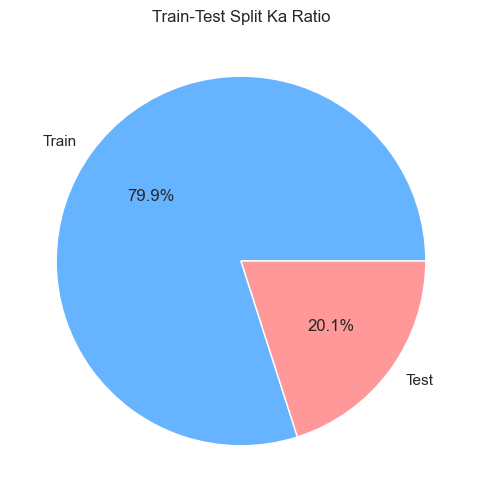

In [24]:
# Pie chart banao split dikhane ke liye
plt.figure(figsize=(6, 6))
plt.pie([X_train.shape[0], X_test.shape[0]], labels=['Train', 'Test'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Train-Test Split Ka Ratio")
plt.show()


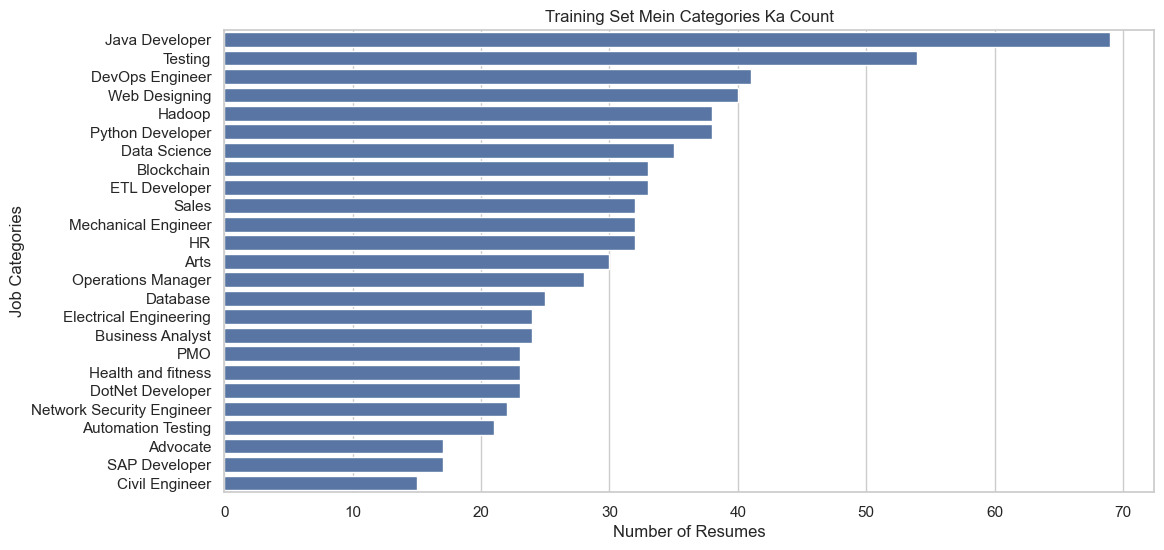

In [25]:

# Bar plot banao categories ke distribution ke liye (train set)
train_df = pd.DataFrame({'Category': label_encoder.inverse_transform(y_train)})
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=train_df, order=train_df['Category'].value_counts().index)
plt.title("Training Set Mein Categories Ka Count")
plt.xlabel("Number of Resumes")
plt.ylabel("Job Categories")
plt.show()


In [ ]:

#cheking splited or not 
print("first 5  train labels:", y_train[:5])
print("first 5 test labels", y_test[:5])
print("Train set  shape:", X_train.shape)
print("Test set  shape:", X_test.shape)

first 5 labels: [ 2  3 18 14  1]
first 5 test labels [15 15 15 13 14]
Train set  shape: (769, 2000)
Test set  shape: (193, 2000)


6. Multiple Models Train Karna
Approach: 4 alag models try karenge—har ek ko tune karenge best performance ke liye, aur accuracy se best model chunenge. Visuals se comparison bhi dikhayenge.

In [27]:
# Models aur unke parameters define karo
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10]},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "XGBoost": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1]},
    "LightGBM": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1], 'num_leaves': [15], 'min_data_in_leaf': [20]}
}

# Training aur results store karo
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n{name} train ho raha hai...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best model nikalo
    best = grid_search.best_estimator_
    y_pred = best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': best, 'accuracy': accuracy, 'y_pred': y_pred}
    
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Best model update karo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best
        best_model_name = name

print(f"\nSabse best model: {best_model_name} with Accuracy: {best_accuracy * 100:.2f}%")




Logistic Regression train ho raha hai...


python(73459) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73462) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(73490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Logistic Regression Accuracy: 99.48%
Best Parameters: {'C': 10}

Random Forest train ho raha hai...
Random Forest Accuracy: 98.96%
Best Parameters: {'max_depth': 20, 'n_estimators': 100}

XGBoost train ho raha hai...
XGBoost Accuracy: 100.00%
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

LightGBM train ho raha hai...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf i

python(74032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/r6/gc51kwm92d7ftm49qgfx4_rr0000gn/T/ipykernel_64649/358669495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


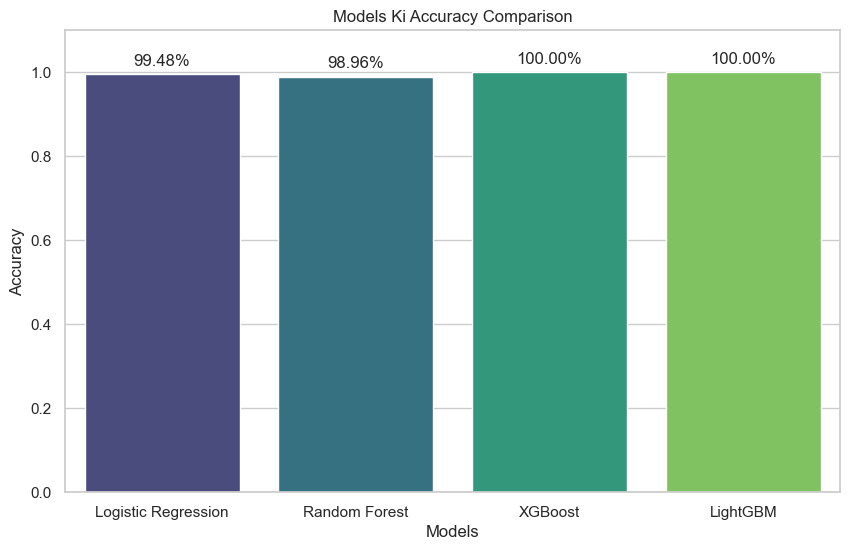

Logistic Regression Training Accuracy: 100.00%
Random Forest Training Accuracy: 100.00%
XGBoost Training Accuracy: 100.00%
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM Training Accuracy: 100.00%


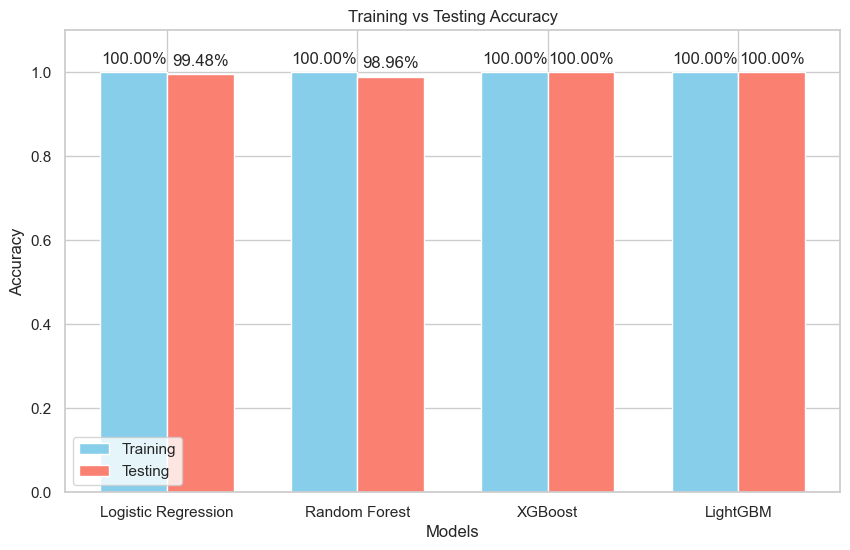


Pehle 5 test labels (actual): ['Java Developer' 'Java Developer' 'Java Developer' 'Hadoop'
 'Health and fitness']
Pehle 5 predictions (XGBoost): ['Java Developer' 'Java Developer' 'Java Developer' 'Hadoop'
 'Health and fitness']
Total unique categories in test: 25


In [29]:
# Accuracy ka bar plot banao
accuracies = [results[name]['accuracy'] for name in results]
model_names = list(results.keys())
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Models Ki Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)  # Thoda extra space upar ke liye
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center')
plt.show()

# Training vs Testing accuracy check karo (overfitting check)
train_accuracies = []
for name in results:
    train_pred = results[name]['model'].predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    print(f"{name} Training Accuracy: {train_acc * 100:.2f}%")

# Training aur Testing accuracy ka comparison plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(model_names))
plt.bar(x - bar_width/2, train_accuracies, bar_width, label='Training', color='skyblue')
plt.bar(x + bar_width/2, accuracies, bar_width, label='Testing', color='salmon')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.xticks(x, model_names)
plt.legend()
plt.ylim(0, 1.1)
for i, v in enumerate(train_accuracies):
    plt.text(i - bar_width/2, v + 0.02, f"{v*100:.2f}%", ha='center')
for i, v in enumerate(accuracies):
    plt.text(i + bar_width/2, v + 0.02, f"{v*100:.2f}%", ha='center')
plt.show()

# Debug: Check karo predictions aur test set
print("\nPehle 5 test labels (actual):", label_encoder.inverse_transform(y_test[:5]))
print("Pehle 5 predictions (XGBoost):", label_encoder.inverse_transform(results['XGBoost']['y_pred'][:5]))
print("Total unique categories in test:", len(set(y_test)))

Logistic Regression Cross-Validation Accuracy: 99.35% (+/- 0.58%)
Random Forest Cross-Validation Accuracy: 99.48% (+/- 0.64%)
XGBoost Cross-Validation Accuracy: 99.74% (+/- 0.52%)
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17526
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 1415
[LightGBM] [Info] Start training from score -3.782565
[LightGBM] [Info] Start training from score -3.243568
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -3.125785
[LightGBM] [Info] Start training from score -3.477183
[LightGBM] [Info

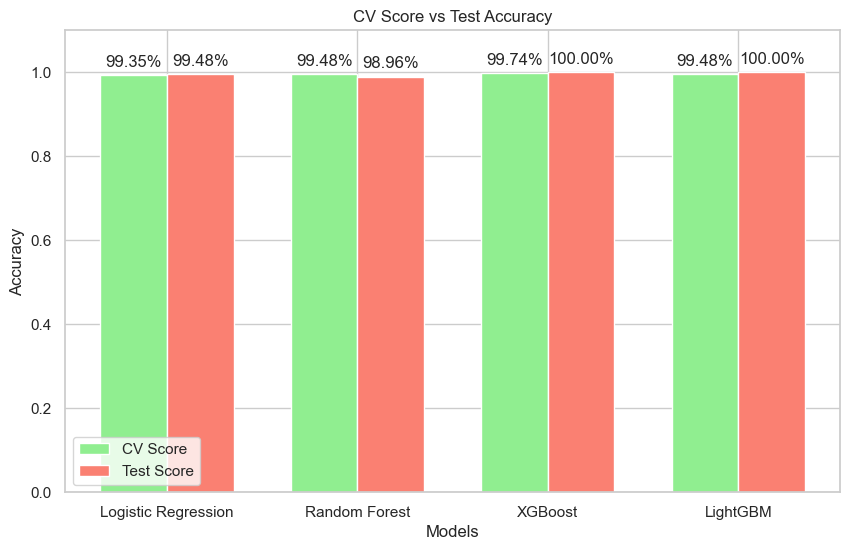

In [30]:
# Cross-validation scores add karo
from sklearn.model_selection import cross_val_score

for name in results:
    cv_scores = cross_val_score(results[name]['model'], X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)")

# Bar plot with CV scores
cv_means = [cross_val_score(results[name]['model'], X_train, y_train, cv=5).mean() for name in results]
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(model_names))
plt.bar(x - bar_width/2, cv_means, bar_width, label='CV Score', color='lightgreen')
plt.bar(x + bar_width/2, accuracies, bar_width, label='Test Score', color='salmon')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("CV Score vs Test Accuracy")
plt.xticks(x, model_names)
plt.legend()
plt.ylim(0, 1.1)
for i, v in enumerate(cv_means):
    plt.text(i - bar_width/2, v + 0.02, f"{v*100:.2f}%", ha='center')
for i, v in enumerate(accuracies):
    plt.text(i + bar_width/2, v + 0.02, f"{v*100:.2f}%", ha='center')
plt.show()

. Best Model Ka Detailed Analysis
Approach: Best model (XGBoost, 100% accuracy wala) ka detail check karenge—classification report, confusion matrix, aur feature importance visualize karenge taaki samajh aaye model kyun itna perfect hai.

In [ ]:
# Best model ka detailed report
best_model_name = "XGBoost"  #  best model
best_y_pred = results[best_model_name]['y_pred']
print(f"\n{best_model_name} ka Classification Report:")
# y_test aur best_y_pred dono numbers mein rakho
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))



XGBoost ka Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop 

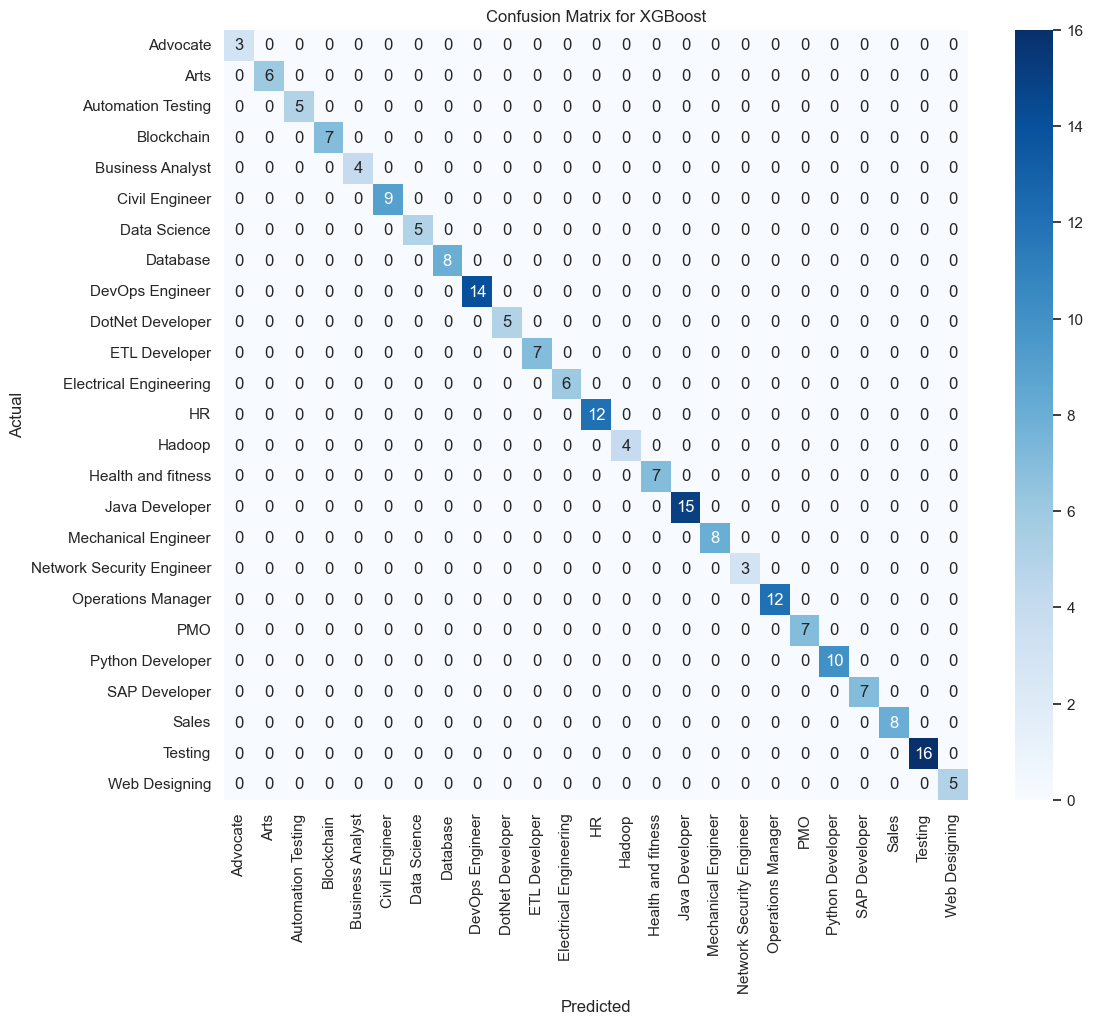

In [34]:

# Confusion matrix ka heatmap
cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


/var/folders/r6/gc51kwm92d7ftm49qgfx4_rr0000gn/T/ipykernel_64649/112639001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[top_indices], y=feature_names[top_indices], palette='magma')


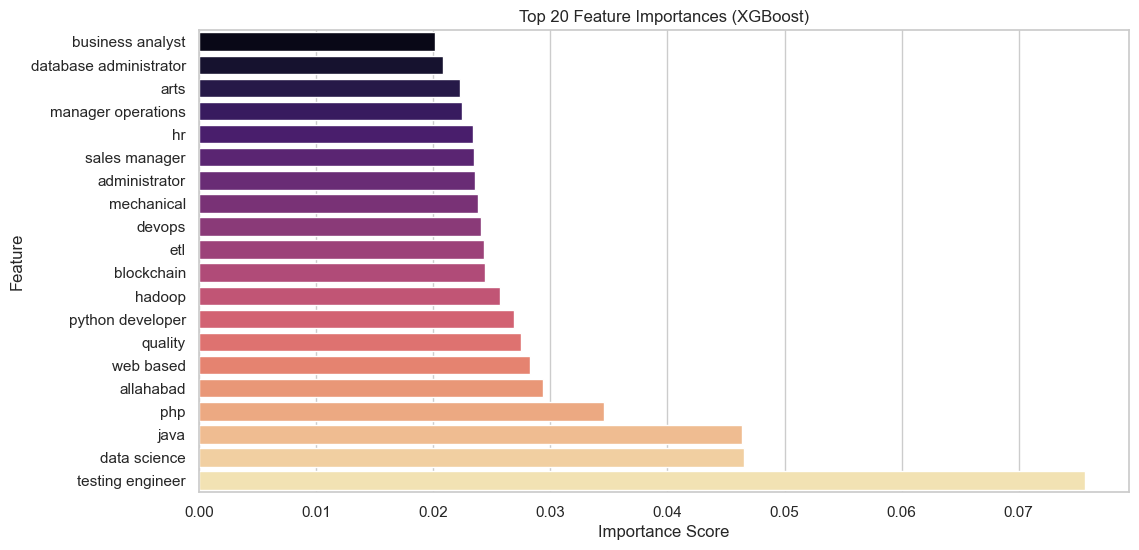

In [35]:

# Feature importance ka bar plot (XGBoost ke liye)
importances = results[best_model_name]['model'].feature_importances_
top_indices = importances.argsort()[-20:]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[top_indices], y=feature_names[top_indices], palette='magma')
plt.title(f"Top 20 Feature Importances ({best_model_name})")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [36]:

# Debug: checking overfitting (train vs test) for best model
print("\nPehle 5 test labels (actual):", label_encoder.inverse_transform(y_test[:5]))
print(f"Pehle 5 predictions ({best_model_name}):", label_encoder.inverse_transform(best_y_pred[:5]))
print("Test set mein unique categories:", len(set(y_test)))
print("Training set mein unique categories:", len(set(y_train)))
print("Duplicate resumes in dataset:", data.duplicated(subset=['Resume']).sum())


Pehle 5 test labels (actual): ['Java Developer' 'Java Developer' 'Java Developer' 'Hadoop'
 'Health and fitness']
Pehle 5 predictions (XGBoost): ['Java Developer' 'Java Developer' 'Java Developer' 'Hadoop'
 'Health and fitness']
Test set mein unique categories: 25
Training set mein unique categories: 25
Duplicate resumes in dataset: 796


saving pickle

In [41]:
import os

# Save folder ka path (tera sahi path)
save_dir = "/Users/shreedhar/sem VI/AI-Carrer-Project/backend/"

# Folder check aur banao (just in case)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Folder bana diya: {save_dir}")
else:
    print(f"Folder already hai: {save_dir}")

# Best model save karo
try:
    with open(os.path.join(save_dir, "resume_model.pkl"), "wb") as f:
        pickle.dump(results[best_model_name]['model'], f)
    with open(os.path.join(save_dir, "vectorizer.pkl"), "wb") as f:
        pickle.dump(vectorizer, f)
    with open(os.path.join(save_dir, "label_encoder.pkl"), "wb") as f:
        pickle.dump(label_encoder, f)
    print("Best model, vectorizer aur label encoder save ho gaye!")
except Exception as e:
    print(f"Error aaya save karte waqt: {e}")

# Debug: Saved files check karo
print("Saved files in folder:", os.listdir(save_dir))

Folder already hai: /Users/shreedhar/sem VI/AI-Carrer-Project/backend/
Best model, vectorizer aur label encoder save ho gaye!
Saved files in folder: ['UpdatedResumeDataSet.csv', 'res', 'label_encoder.pkl', 'requirements.txt', 'training.ipynb', 'models', '__pycache__', 'utils.py', '.env', 'figures', 'app.py', '.ipynb_checkpoints', 'vectorizer.pkl', 'resume_model.pkl']


In [ ]:
import pickle
import os


save_dir = "/Users/shreedhar/sem VI/AI-Carrer-Project/backend/"

# Files load 
try:
    with open(os.path.join(save_dir, "vectorizer.pkl"), "rb") as f:
        vectorizer = pickle.load(f)
    with open(os.path.join(save_dir, "resume_model.pkl"), "rb") as f:
        model = pickle.load(f)
    with open(os.path.join(save_dir, "label_encoder.pkl"), "rb") as f:
        label_encoder = pickle.load(f)
    print("Model, vectorizer aur label encoder load ho gaye!")
except FileNotFoundError as e:
    print(f"File nahi mili: {e} — Pehle save step run karo!")
except Exception as e:
    print(f"Error aaya: {e}")

# Text cleaning function (training wala same use karo)
def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Special chars hatao
    text = re.sub(r'\d+', '', text)  # Numbers hatao
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Prediction function
def predict_job_role(resume_text):
    cleaned_text = clean_text(resume_text)
    text_vector = vectorizer.transform([cleaned_text])  # Text ko numbers mein badlo
    prediction_encoded = model.predict(text_vector)[0]  # Predict karo
    confidence = model.predict_proba(text_vector)[0].max() * 100  # Confidence score
    prediction = label_encoder.inverse_transform([prediction_encoded])[0]  # Category name
    return {"job_role": prediction, "confidence": f"{confidence:.2f}%"}

# Test prediction
sample_text = "Python Developer with 3 years experience"
result = predict_job_role(sample_text)
print("\nPrediction for sample resume:")
print(result)

# Debug: Input aur output check karo
print("Cleaned input text:", clean_text(sample_text))
print("Predicted label (encoded):", model.predict(vectorizer.transform([clean_text(sample_text)]))[0])

Model, vectorizer aur label encoder load ho gaye!

Prediction for sample resume:
{'job_role': 'Python Developer', 'confidence': '98.79%'}
Cleaned input text: python developer years experience
Predicted label (encoded): 20


In [47]:
import pickle
import os

# Save directory (tera path)
save_dir = "/Users/shreedhar/sem VI/AI-Carrer-Project/backend/"

# Files load karo
try:
    with open(os.path.join(save_dir, "resume_model.pkl"), "rb") as f:
        model = pickle.load(f)
    with open(os.path.join(save_dir, "vectorizer.pkl"), "rb") as f:
        vectorizer = pickle.load(f)
    with open(os.path.join(save_dir, "label_encoder.pkl"), "rb") as f:
        label_encoder = pickle.load(f)
    print("Sab files load ho gayi!")
except Exception as e:
    print(f"Load karte waqt error: {e}")

# Text clean karne ka function (training wala same)
def clean_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Special chars hatao
    text = re.sub(r'\d+', '', text)  # Numbers hatao
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Prediction function
def predict_job_role(resume_text):
    cleaned_text = clean_text(resume_text)
    X = vectorizer.transform([cleaned_text])  # Text ko numbers mein badlo
    prediction_encoded = model.predict(X)[0]  # Model se prediction
    confidence = model.predict_proba(X)[0].max() * 100  # Confidence score
    prediction = label_encoder.inverse_transform([prediction_encoded])[0]  # Number to category
    return {"job_role": prediction, "confidence": f"{confidence:.2f}%"}

# Sample resume test karo
sample_resume = """
Skills: Python, Java, SQL, Machine Learning
Experience: 3 years as a Data Scientist at XYZ Corp
Education: B.Tech in Computer Science
"""
result = predict_job_role(sample_resume)
print("\nSample Resume Prediction:")
print(result)

# Debug: Check karo input aur output
print("Cleaned resume sample:", clean_text(sample_resume)[:50])

Sab files load ho gayi!

Sample Resume Prediction:
{'job_role': 'Java Developer', 'confidence': '85.10%'}
Cleaned resume sample: skills python java sql machine learning experience
